# Property Sales Linear Regression Project

## Table of Contents 
1. Introduction
2. Preparing the Data
3. Cleaning the Data
4. Exploratory Data
5. Analyzing the Data
6. Results
7. Conclusion

## Introduction

Have you ever wondered how real estate owners establish their own sale price of the buildings they own? 

This project analyzes data from a data set that contains sales data of every building sold in the New York City property market over a 12-month period.  

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve our question: 

Which variables are most closely correlated with the prediction of sale price of these properties?



## Preparing the Data
 
There are numerous packages that are needed for this project imported down below.

In [1]:
# We will be using the module LinearRegression from sklearn.linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Using pandas to convert the csv file into a panda dataframe
df = pd.read_csv("nyc-rolling-sales.csv")
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
df.shape

(84548, 22)

We can observe using the shape function to observe that the dataframe has 84548 data points with 22 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

## Cleaning the Data
 
We clean the data to make our final analysis more precise and accurate. We convert the specific variables into floats to make the data easier to organize. We also need to set our sale data using the datetime function to convert it the date without the time.

In [5]:
# We convert the boroughs into the actual names of them
df['BOROUGH'] = df['BOROUGH'].astype(str)
df['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [6]:
# Update all the columns to lowercase
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df.columns

Index(['unnamed:_0', 'borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'ease-ment',
       'building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')

In [7]:
# Update all of the variables that should be an integer for its dtype
num_vars = ['residential_units', 'commercial_units', 'total_units', 
            'land_square_feet', 'gross_square_feet', 'sale_price']

for col in num_vars:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

In [8]:
# Update all of the variables that should be an category for its dtype
cat_vars = ['neighborhood', 'building_class_category', 'tax_class_at_present', 'tax_class_at_time_of_sale',
            'ease-ment', 'building_class_at_present', 'address', 'apartment_number',
            'building_class_at_time_of_sale', 'block', 'lot', 'zip_code',]

for col in cat_vars:
    df[col] = df[col].astype('O')

In [9]:
# Using the to_datetime function
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [10]:
# Let's recheck the dtype using info function for our updated dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   unnamed:_0                      84548 non-null  int64         
 1   borough                         84548 non-null  object        
 2   neighborhood                    84548 non-null  object        
 3   building_class_category         84548 non-null  object        
 4   tax_class_at_present            84548 non-null  object        
 5   block                           84548 non-null  object        
 6   lot                             84548 non-null  object        
 7   ease-ment                       84548 non-null  object        
 8   building_class_at_present       84548 non-null  object        
 9   address                         84548 non-null  object        
 10  apartment_number                84548 non-null  object        
 11  zi

In [11]:
# Lets check the number of null values in the dataframe
df.isnull().sum()

unnamed:_0                            0
borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                  0
block                                 0
lot                                   0
ease-ment                             0
building_class_at_present             0
address                               0
apartment_number                      0
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                  26252
gross_square_feet                 27612
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                        14561
sale_date                             0
dtype: int64

In [12]:
# We can drop the duplicates using the function drop_duplicates()
df = df.drop_duplicates()

In [13]:
# We can also drop the values that contains NAN 
df.dropna(inplace=True)

In [14]:
# Lets recheck again for the sum of the null values
df.isnull().sum()

unnamed:_0                        0
borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
ease-ment                         0
building_class_at_present         0
address                           0
apartment_number                  0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
dtype: int64

In [15]:
# To make our lives easier, we can calculate the age of the buildings 
df['age'] = 2023 - df['year_built']

In [16]:
# We do not need these unnecessary columns
df = df.drop(columns=['year_built', 'unnamed:_0'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48244 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         48244 non-null  object        
 1   neighborhood                    48244 non-null  object        
 2   building_class_category         48244 non-null  object        
 3   tax_class_at_present            48244 non-null  object        
 4   block                           48244 non-null  object        
 5   lot                             48244 non-null  object        
 6   ease-ment                       48244 non-null  object        
 7   building_class_at_present       48244 non-null  object        
 8   address                         48244 non-null  object        
 9   apartment_number                48244 non-null  object        
 10  zip_code                        48244 non-null  object        
 11  re

In [18]:
# Since this is a large dataset, we can proceed to analyze the different quadrants of the data in order to make our data smaller
df.describe()

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,sale_price,age
count,48244.000000,48244.000000,48244.000000,4.824400e+04,4.824400e+04,4.824400e+04,48244.000000
mean,2.566537,0.249171,2.834632,3.358117e+03,3.669753e+03,1.153281e+06,195.234827
std,17.465481,10.988072,20.750418,3.143590e+04,2.947491e+04,1.340131e+07,464.361153
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.000000
25%,1.000000,0.000000,1.000000,1.413000e+03,8.280000e+02,8.042000e+04,62.000000
50%,1.000000,0.000000,1.000000,2.140000e+03,1.620000e+03,4.800000e+05,92.000000
75%,2.000000,0.000000,2.000000,3.071000e+03,2.520000e+03,8.300000e+05,103.000000
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2.210000e+09,2023.000000


After analyzing, we can infer that the 75% percentile is the most effective to achieve feasible results from our data table. There is a large amount of sale prices below the $1,000 so we can remove those properties while also making sure the land square feet is less than the gross square feet. 


In [19]:
df = df[(df['sale_price'] < 2000000) #limit up to $2,000,000 
                       & (df['sale_price'] > 1000) #removes all properties less than $1,000
                       & (df['land_square_feet'] < df['gross_square_feet']) #removes instances where land sf is greater than gross sf
                       & (df['gross_square_feet'] < 2500) #removes instances where gross sf is greater than 2530 SF
                       & (df['gross_square_feet'] > 200)] #removes instances where gross sf is less than 120 SF

## Exploratory Data

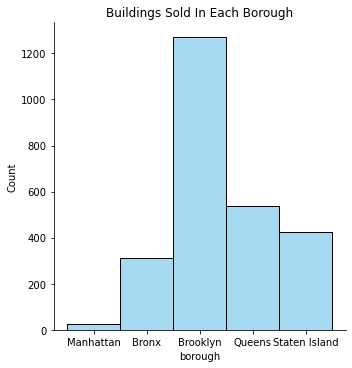

In [20]:
# Lets observe the number of buildings sold in each borough using displot from seaborn
sns.displot(data=df, x = df.borough, kind="hist", binwidth = 5, color = 'skyblue')
plt.title("Buildings Sold In Each Borough")
plt.show()

Brooklyn has the greatest amount of buildings sold while Manhattan has the lowest. This makes sense because the Metropolitan is known for their expensive rent while Brooklyn is affordable and in the middle of Queens and Manhattan for traveling convenience. This can be attractive for young and older adults.

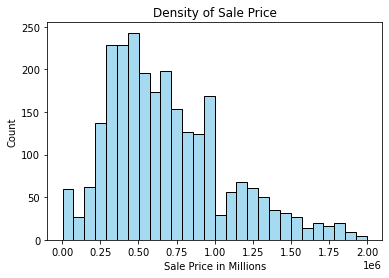

<Figure size 432x288 with 0 Axes>

In [21]:
# Lets observe the prices of the buildings altogether
sns.histplot(data = df, x = 'sale_price', color = 'skyblue')
plt.title('Density of Sale Price')
plt.xlabel('Sale Price in Millions')
plt.ylabel('Count')
plt.show()
plt.clf()

This distribution plot is right skewed or negatively skewed. This describes how the mean is greater than the median as you can most of the buildings that were sold were around 250K ~ 500K. This is realistic because the middle class is the most common throughout the 5 boroughs.

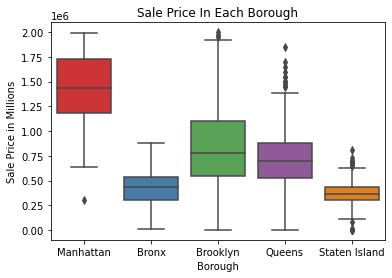

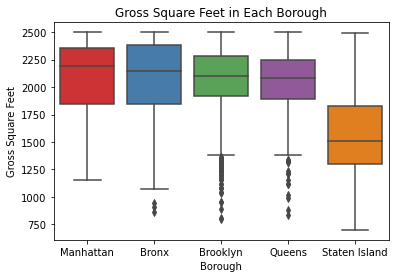

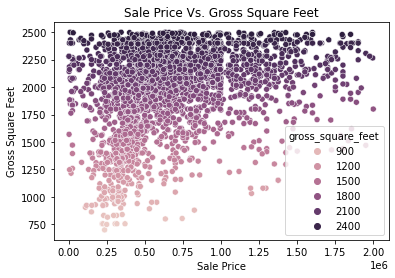

<Figure size 432x288 with 0 Axes>

In [22]:
# More visualizations to help us understand the data
sns.boxplot(x = 'borough', y = 'sale_price', data = df, palette = 'Set1')
plt.title('Sale Price In Each Borough')
plt.xlabel('Borough')
plt.ylabel('Sale Price in Millions')
plt.show()

sns.boxplot(x = 'borough', y = 'gross_square_feet', data = df, palette = 'Set1')
plt.title('Gross Square Feet in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Gross Square Feet')
plt.show()
plt.clf()

sns.scatterplot(x = 'sale_price', y = 'gross_square_feet', data = df, hue = 'gross_square_feet')
plt.title('Sale Price Vs. Gross Square Feet')
plt.xlabel('Sale Price')
plt.ylabel('Gross Square Feet')
plt.show()
plt.clf()

## Analyzing the Data 

Now that we have a better understanding of what the prices and other variables represent, we can utilize a heat map displaying the correlation to determine the relationship between variables.

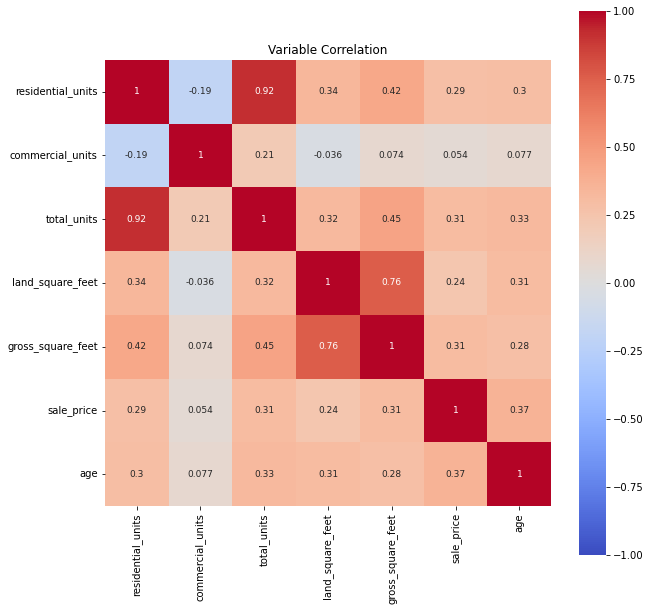

<Figure size 432x288 with 0 Axes>

In [23]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, cmap = 'coolwarm', square=True, annot= True, annot_kws={"size": 9}, vmin=-1, vmax=1)
plt.title('Variable Correlation')
plt.show()
plt.clf()

Weak Correlation:                 
Sale Price vs Commercial Units                                            

Moderate Correlation:             
Sale Price vs Residential Units                   
Sale Price vs Total Units                         
Sale Price vs Land Square Feet  
Sale Price vs Gross Square Feet                
Sale Price vs Age

In [24]:
# We can set up our x and y variables for multiple linear regression test
x = df[['residential_units','total_units','land_square_feet', 'gross_square_feet', 'age']]
y = df[['sale_price']]

In [25]:
# We train and fit our model using Linear Regression
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [26]:
# We can test our model using the predict function
y_pred = model.predict(x_test)

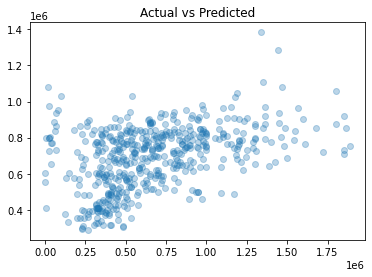

In [27]:
# We can display the actual and predicted values for our test
plt.scatter(y_test, y_pred, alpha = 0.3)
plt.title('Actual vs Predicted')
plt.show()

In [28]:
model.score(x_test, y_test)

0.17793522998950628

In [29]:
model.coef_

array([[12146.82456896, 51070.78265748,   -88.0536287 ,   260.85334504,
         2972.77282608]])

In [30]:
coef_df = pd.DataFrame(data = model.coef_, columns = ['residential_units','total_units','land_square_feet', 'gross_square_feet', 'age'])
coef_df

,residential_units,total_units,land_square_feet,gross_square_feet,age
0,12146.824569,51070.782657,-88.053629,260.853345,2972.772826


For Every One Unit of Increase:

Residential Units is correlated with a 24,522.41 USD decrease in Sale Price              
Total Units is correlated with a 33,107 USD in Sale Price                 
Land Square Feet is correlated with a 75.82 USD decrease in Sale Price                        
Gross Square Feet is correlated with a 235.55 USD feet increase in Sale Price                     
Age is correlated with a 3,064.98 USD increase in Sale Price                  

## Conclusion

In conclusion, the linear regression analysis of property sales in NYC over a 12-month period revealed several key findings. Firstly, the study found that there is a strong correlation between the number of residential units and sale price, with a decrease of 24,522.41 USD for every one unit of increase. Additionally, the study found that the total number of units is also strongly correlated with sale price, with an increase of 33,107 USD for every one unit of increase.

Furthermore, the study also found that there is a correlation between land square feet and sale price, with a decrease of 75.82 USD for every one unit of increase. On the other hand, the study found that gross square feet is correlated with an increase in sale price, with an increase of 235.55 USD for every one unit of increase. Lastly, age of the property also had a positive correlation with sale price, with an increase of 3,064.98 USD for every one unit of increase. Overall, the model score for this analysis is 0.177, indicating a low level of accuracy. 

We can conclude that our independent variables are not correlating enough information to bring enough change in the value of our depedent variables. The score from our model indicates a value of 0.177. THis low score explains how the variables from this sales data help us infer that these variables do not have a large effect on how much the buildings were sold. 